In [1]:
library(Signac)
library(Seurat)
library(GenomeInfoDb)
library(EnsDb.Hsapiens.v86)
library(ggplot2)
library(patchwork)
library('dplyr')
library('tidyr')
library('ggplot2')
library('Matrix')
library(tibble)

set.seed(17)

Attaching SeuratObject

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: ensembldb

Loading required package: GenomicRanges

Loading required package: GenomicFeatures

Loading required p

In [2]:
obj <- readRDS("/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/takedaICI_ATAC_15samples_cDC031821.rds")

In [3]:
DefaultAssay(obj) <- 'peaks_ChromatinAssay'


In [4]:
obj

An object of class Seurat 
876943 features across 235 samples within 3 assays 
Active assay: peaks_ChromatinAssay (428668 features, 129923 variable features)
 2 other assays present: peaks, gene.activities
 7 dimensional reductions calculated: lsi, harmony, umap, featureumap, globalumap, pca, DEGumap

In [5]:
ChromatinAssay <- obj$peaks_ChromatinAssay

In [6]:
ChromatinAssay

ChromatinAssay data with 428668 features for 235 cells
Variable features: 129923 
Genome: hg38 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

# construct motif class

In [7]:
library(GO.db)
library(motifmatchr)
library(JASPAR2020)
library(TFBSTools)




Attaching package: 'TFBSTools'


The following object is masked from 'package:Matrix':

    Matrix




In [8]:
library(BSgenome.Hsapiens.UCSC.hg38)

Loading required package: BSgenome

Loading required package: Biostrings

Loading required package: XVector


Attaching package: 'Biostrings'


The following object is masked from 'package:base':

    strsplit


Loading required package: rtracklayer



In [9]:
# Get a list of motif position frequency matrices from the JASPAR database
pfm <- getMatrixSet(
  x = JASPAR2020,
  opts = list(species = 9606,all_versions = FALSE ) # 9606 is the species code for human
)

In [10]:
main.chroms <- standardChromosomes(BSgenome.Hsapiens.UCSC.hg38)
keep.peaks <- as.logical(seqnames(granges(ChromatinAssay)) %in% main.chroms)


In [11]:
ChromatinAssay <- subset(ChromatinAssay, features = rownames(ChromatinAssay)[keep.peaks])

In [12]:
obj$peaks_ChromatinAssay <- ChromatinAssay 

In [13]:
# Scan the DNA sequence of each peak for the presence of each motif
motif.matrix <- CreateMotifMatrix(
  features = granges(ChromatinAssay),
  pwm = pfm,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  sep = c(":", "-"),
  use.counts = FALSE
)

Warning message in .Seqinfo.mergexy(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chrM, chr1_GL383518v1_alt, chr1_GL383519v1_alt, chr1_GL383520v2_alt, chr1_KI270759v1_alt, chr1_KI270760v1_alt, chr1_KI270761v1_alt, chr1_KI270762v1_alt, chr1_KI270763v1_alt, chr1_KI270764v1_alt, chr1_KI270765v1_alt, chr1_KI270766v1_alt, chr1_KI270892v1_alt, chr2_GL383521v1_alt, chr2_GL383522v1_alt, chr2_GL582966v2_alt, chr2_KI270767v1_alt, chr2_KI270768v1_alt, chr2_KI270769v1_alt, chr2_KI270770v1_alt, chr2_KI270771v1_alt, chr2_KI270772v1_alt, chr2_KI270773v1_alt, chr2_KI270774v1_alt, chr2_KI270775v1_alt, chr2_KI270776v1_alt, chr2_KI270893v1_alt, chr2_KI270894v1_alt, chr3_GL383526v1_alt, chr3_JH636055v2_alt, chr3_KI270777v1_alt, chr3_KI270778v1_alt, chr3_KI270779v1_alt, chr3_KI270780v1_alt, chr3_KI270781v1_alt, chr3_KI270782v1_alt, chr3_KI270783v1_alt, chr3_KI270784v1_alt, chr3_KI270895v1_alt, chr3_KI270924v1_alt, chr3_KI270934v1_alt, chr3_KI270935v1_alt, chr3_KI2

In [14]:
# Create a new Mofif object to store the results
motif <- CreateMotifObject(
  data = motif.matrix,
  pwm = pfm
)

In [15]:
motif

A Motif object containing 633 motifs in 428400 regions

In [16]:
Motifs(obj$peaks_ChromatinAssay) <- motif

In [17]:
obj <- RegionStats(
  object = obj,
  genome = BSgenome.Hsapiens.UCSC.hg38,
  sep = c(":", "-")
)

Warning message in .Seqinfo.mergexy(x, y):
"Each of the 2 combined objects has sequence levels not in the other:
  - in 'x': chrM, chr1_GL383518v1_alt, chr1_GL383519v1_alt, chr1_GL383520v2_alt, chr1_KI270759v1_alt, chr1_KI270760v1_alt, chr1_KI270761v1_alt, chr1_KI270762v1_alt, chr1_KI270763v1_alt, chr1_KI270764v1_alt, chr1_KI270765v1_alt, chr1_KI270766v1_alt, chr1_KI270892v1_alt, chr2_GL383521v1_alt, chr2_GL383522v1_alt, chr2_GL582966v2_alt, chr2_KI270767v1_alt, chr2_KI270768v1_alt, chr2_KI270769v1_alt, chr2_KI270770v1_alt, chr2_KI270771v1_alt, chr2_KI270772v1_alt, chr2_KI270773v1_alt, chr2_KI270774v1_alt, chr2_KI270775v1_alt, chr2_KI270776v1_alt, chr2_KI270893v1_alt, chr2_KI270894v1_alt, chr3_GL383526v1_alt, chr3_JH636055v2_alt, chr3_KI270777v1_alt, chr3_KI270778v1_alt, chr3_KI270779v1_alt, chr3_KI270780v1_alt, chr3_KI270781v1_alt, chr3_KI270782v1_alt, chr3_KI270783v1_alt, chr3_KI270784v1_alt, chr3_KI270895v1_alt, chr3_KI270924v1_alt, chr3_KI270934v1_alt, chr3_KI270935v1_alt, chr3_KI2

# Find overrepresented motifs

In [36]:
da_peaks <- FindMarkers(
  object = obj,
  ident.1 = "cDC3",
  min.pct = 0.05,
  only.pos = TRUE,
  test.use = 'LR',
  latent.vars = 'peak_region_fragments'
)

In [22]:
# da_peaks <- read.csv( "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/cDC3_da_peaks.csv", row.names=1)

In [32]:
# da_peaks <- da_peaks[da_peaks$avg_log2FC > 0, ]

In [37]:
top.da.peak <- rownames(da_peaks[da_peaks$p_val < 0.005, ])

In [38]:
# test enrichment
enriched.motifs <- FindMotifs(
  object = obj,
  features = top.da.peak
)

Selecting background regions to match input sequence characteristics

Matching GC.percent distribution

Testing motif enrichment in 1598 regions



Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


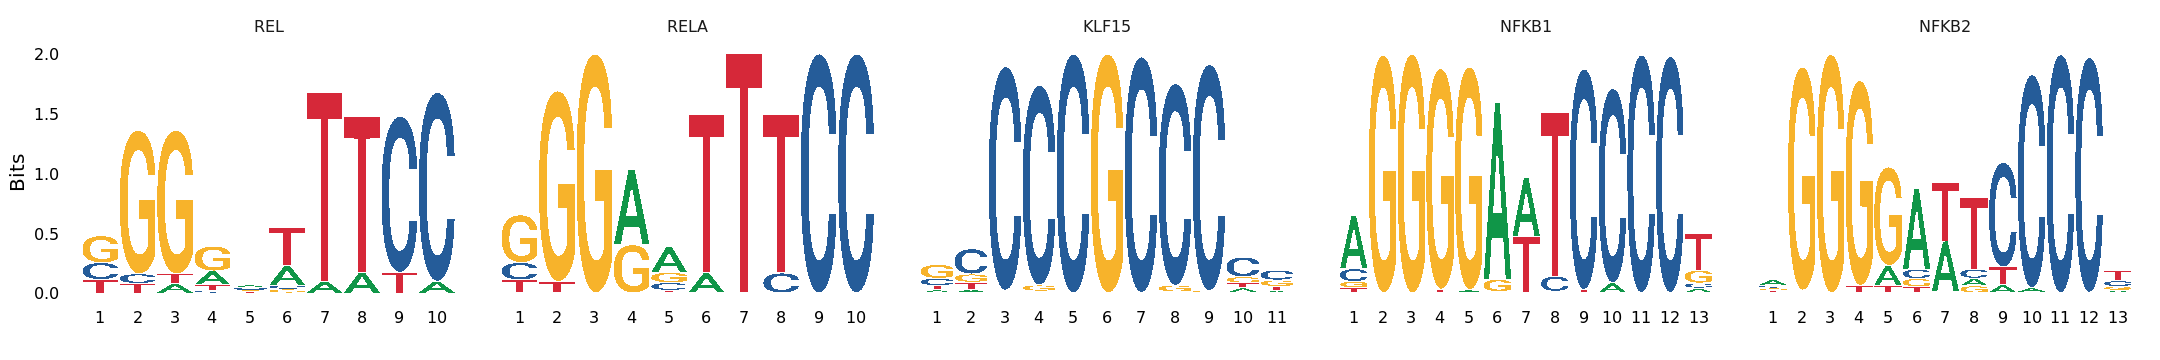

In [45]:
options(repr.plot.height = 3, repr.plot.width = 18)

MotifPlot(
  object = obj,
  motifs = c('MA0101.1','MA0107.1','MA1513.1','MA0105.4','MA0778.1'), ncol = 5
)

Warning message:
"`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead."


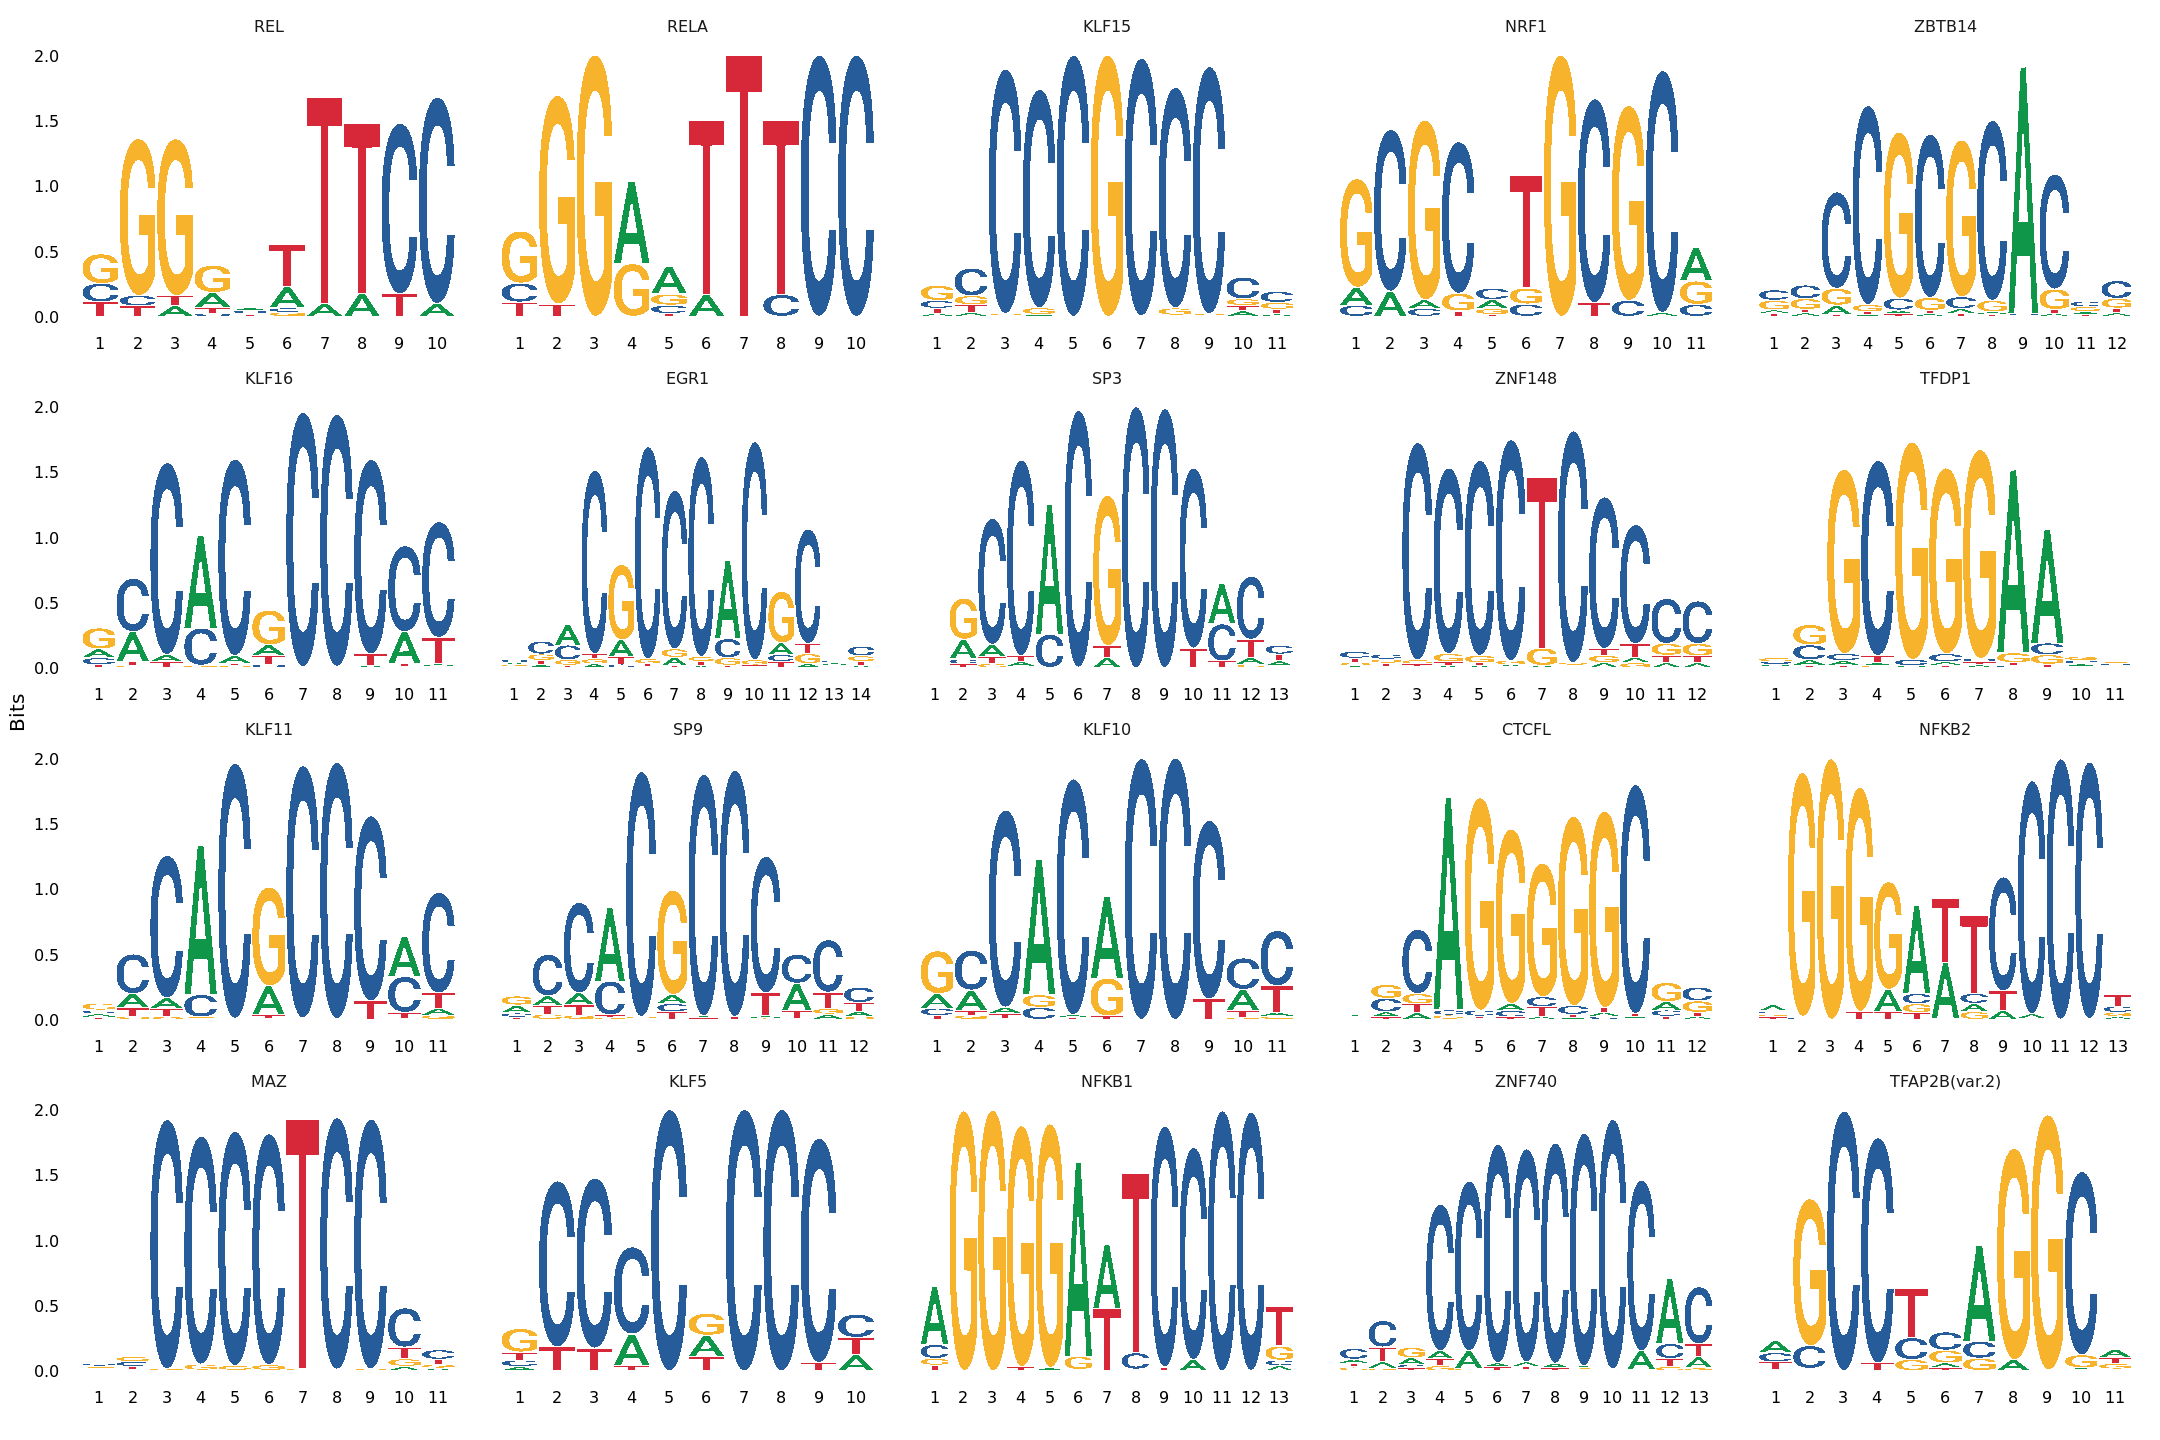

In [41]:
options(repr.plot.height = 12, repr.plot.width = 18)

MotifPlot(
  object = obj,
  motifs = head(rownames(enriched.motifs), 20), ncol = 5
)

In [42]:
saveRDS(obj, "/net/bmc-lab5/data/kellis/users/ruiwenfu/scATAC/metastatic_all/takedaICI_ATAC_15samples_cDC042022.rds")